In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [2]:
np.random.seed(42)

# 1. Import the train datasets

In [3]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [4]:
Model_1 = Lasso()

# 2. Setup Pipeline

In [5]:
pca=PCA()
SLR = Model_1

In [6]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("pca",pca),("SLR",SLR)])

In [7]:
param_grid = {
    "pca__n_components": [5, 10, 30, 45, 60, 100 ,150 ,170],
    "SLR__alpha":[0.05,0.1,0.2,0.5,1,2,8,10,100,1000,10000]
}

# 3. Setup GridSearch

In [8]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [9]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()), ('SLR', Lasso())]),
             n_jobs=-1,
             param_grid={'SLR__alpha': [0.05, 0.1, 0.2, 0.5, 1, 2, 8, 10, 100,
                                        1000, 10000],
                         'pca__n_components': [5, 10, 30, 45, 60, 100, 150,
                                               170]},
             scoring='neg_mean_squared_error')

In [10]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.854):
{'SLR__alpha': 0.05, 'pca__n_components': 100}


In [11]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SLR__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
5,0.170620,0.018965,0.005925,0.006740,0.05,100,"{'SLR__alpha': 0.05, 'pca__n_components': 100}",-0.785877,-0.796579,-0.955375,-0.935210,-1.009447,-0.713204,-0.743926,-0.843259,-0.877286,-0.884554,-0.854472,0.090831,1
6,0.095437,0.012651,0.012191,0.006392,0.05,150,"{'SLR__alpha': 0.05, 'pca__n_components': 150}",-0.730444,-0.748982,-1.489613,-0.924766,-0.947118,-0.667845,-0.687494,-0.798476,-0.835862,-0.808362,-0.863896,0.226024,2
7,0.104364,0.015273,0.011725,0.004624,0.05,170,"{'SLR__alpha': 0.05, 'pca__n_components': 170}",-0.730444,-0.748982,-1.489613,-0.924766,-0.947118,-0.667845,-0.687494,-0.798476,-0.835862,-0.808362,-0.863896,0.226024,2
4,0.109873,0.014604,0.011239,0.008046,0.05,60,"{'SLR__alpha': 0.05, 'pca__n_components': 60}",-0.788921,-0.802672,-0.996372,-0.943503,-1.028498,-0.728141,-0.774549,-0.851798,-0.879780,-0.926341,-0.872058,0.095076,4
3,0.111119,0.009490,0.008576,0.006128,0.05,45,"{'SLR__alpha': 0.05, 'pca__n_components': 45}",-0.805630,-0.848194,-0.980529,-0.977448,-1.080263,-0.737760,-0.775139,-0.857397,-0.882057,-0.923783,-0.886820,0.099722,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0.111944,0.025215,0.010796,0.005081,8,150,"{'SLR__alpha': 8, 'pca__n_components': 150}",-1.335629,-1.278040,-1.387610,-1.688652,-1.626386,-1.130144,-1.393647,-1.347467,-1.382383,-1.351740,-1.392170,0.152115,33
55,0.095830,0.010025,0.006581,0.004990,8,170,"{'SLR__alpha': 8, 'pca__n_components': 170}",-1.335629,-1.278040,-1.387610,-1.688652,-1.626386,-1.130144,-1.393647,-1.347467,-1.382383,-1.351740,-1.392170,0.152115,33
56,0.064197,0.009190,0.008655,0.006741,10,5,"{'SLR__alpha': 10, 'pca__n_components': 5}",-1.335629,-1.278040,-1.387610,-1.688652,-1.626386,-1.130144,-1.393647,-1.347467,-1.382383,-1.351740,-1.392170,0.152115,33
58,0.090909,0.033447,0.016991,0.019900,10,30,"{'SLR__alpha': 10, 'pca__n_components': 30}",-1.335629,-1.278040,-1.387610,-1.688652,-1.626386,-1.130144,-1.393647,-1.347467,-1.382383,-1.351740,-1.392170,0.152115,33


# 4. Best Hyperparameter

In [12]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'SLR__alpha': 0.05, 'pca__n_components': 100}


# 5. Evaluate Model $log(Sales)$

In [13]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_alpha=parms.iloc[0][0]['SLR__alpha']

In [14]:
Model_2 = Lasso(alpha=best_alpha)

In [15]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [16]:
pca1 = PCA(n_components=100)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
SLR1 = Model_2
SLR1.fit(PX_train1,Y_train1)

Lasso(alpha=0.05)

In [17]:
pca2 = PCA(n_components=100)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [18]:
MSE(SLR1.predict(PX_test1),Y_test1)

1.8629205553584958

In [19]:
result = pd.DataFrame(np.exp(Y_test1))

In [20]:
result["Predicted_sales"] = np.exp(SLR1.predict(PX_test1))

In [21]:
MSE(result["sales"],result["Predicted_sales"])

1086.5520500711366

# 5.1 Model using original sales data

In [22]:
Model_3 = Lasso(alpha=best_alpha)

In [23]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [24]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [25]:
pca3 = PCA(n_components=100)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
SLR2 = Model_3
SLR2.fit(PX_train2,Y_train2)

Lasso(alpha=0.05)

In [26]:
pca4 = PCA(n_components=100)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [27]:
MSE(SLR2.predict(PX_test2),Y_test2)

1903.8169987483031

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [28]:
residual = result['sales']-result['Predicted_sales']

In [29]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [30]:
import scipy.stats as sct

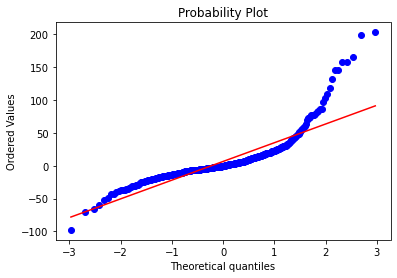

In [31]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [32]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

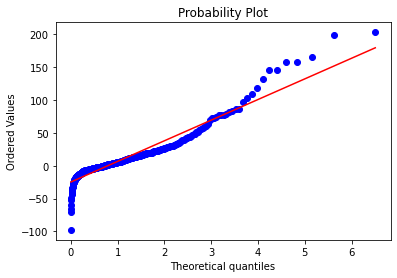

In [33]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [34]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

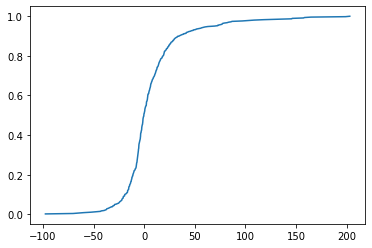

In [35]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

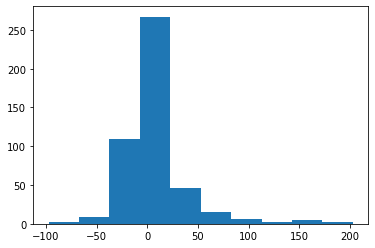

In [36]:
plt.hist(Sample)
plt.show()

In [37]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [38]:
offset = inv(Sample,jumps,2/3)
offset

7.277282400775938

In [39]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [40]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [41]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [48]:
#Profit (None)
profit_lst = profit(round(result['sales']),round(result['Predicted_sales']))
profit_lst.sum()

23508.0

In [42]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

24720.0

In [43]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

24032.0

In [44]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

26552.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [45]:
Model_4=Lasso(alpha=best_alpha)

In [46]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca,random_state=42)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    SLR_K = Model_4
    SLR_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca,random_state=42)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(np.exp(SLR_K.predict(PX_test_K)),np.exp(Y_test_K)))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(SLR_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual_K.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size_K+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)




mse_table = pd.DataFrame(mse_lst,index=col_name,columns=['Cross Validation MSE'])
mse_table

,Cross Validation MSE
Dataset_1,3831.748612
Dataset_2,1653.739551
Dataset_3,7427.746609
Dataset_4,2700.809937
Dataset_5,5173.834045
Dataset_6,1980.981491
Dataset_7,8688.805068
Dataset_8,1339.381052
Dataset_9,1698.046203
Dataset_10,5285.486025


In [50]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.131065,0.284515,-0.145758,0.220343,0.005077,0.222803,-0.074906,0.281960,0.271922,-0.029677,0.116734
Exponential,0.226271,0.260651,0.003110,0.258197,0.137792,0.235505,0.163617,0.246401,0.267806,0.168267,0.196762
Empirical,0.263000,0.310412,0.074564,0.293391,0.163981,0.287953,0.205114,0.293235,0.301181,0.202171,0.239500


In [51]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,5424.0,12876.0,-6748.0,10268.0,252.0,8700.0,-3668.0,13004.0,12156.0,-1236.0,5102.8,7024.247843
Exponential,9364.0,11796.0,144.0,12032.0,6840.0,9196.0,8012.0,11364.0,11972.0,7008.0,8772.8,3451.451544
Empirical,10884.0,14048.0,3452.0,13672.0,8140.0,11244.0,10044.0,13524.0,13464.0,8420.0,10689.2,3173.342490
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [49]:
print(f"Average 10 fold CV MSE:  {float(mse_table.mean())}")

Average 10 fold CV MSE:  3978.057859266337


In [47]:
profit_table.to_csv(".\\Model_Selection_Result\\2.4_Lin_reg_lasso.csv")

In [52]:
name = "2.4_Lin_reg_lasso.csv"
mse_table.to_csv(f".\\Model_CV_Result_MSE\\{name}")

In [53]:
f = pd.DataFrame(fraction_table['mean_fraction'])
f = f.transpose().reset_index()
f.to_csv(f".\\Model_CV_Result_Efficiency\\{name}")